<a href="https://colab.research.google.com/github/Aryabhatt-O/ML-Feat-Computational-Geometry/blob/main/Traditional_K_Means(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing required libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

## **Loading the Dataset**

In [ ]:
iris = datasets.load_iris()
print("Dataset loaded successfully")

Dataset loaded successfully


## **Exploratory Data Analysis**

### **Reading Dataset**

In [ ]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)

#Top values of Dataset
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Bottom Values of Dataset
Data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### **Shape of Data**

In [ ]:
Data.shape

(150, 4)

### **Data Information**

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From above one can clearly see that there is no null vlues. 

### **Statistical Properties of Dataset**

In [ ]:
Data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Data Visualization**


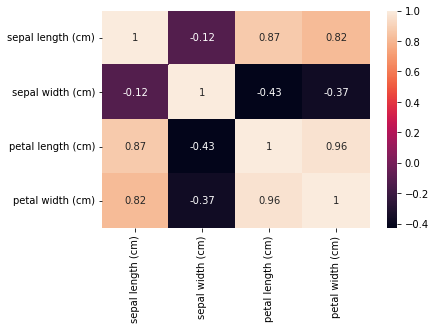

In [ ]:
sns.heatmap(Data.corr(), annot = True, linecolor='black')

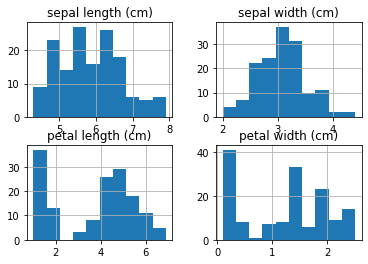

In [ ]:
Data.hist()
plt.show()

## **Finding numbers of Clusters for Kmeans**

This is one of the most important task. We can find this Kmeans Clusters using *elbow* method.

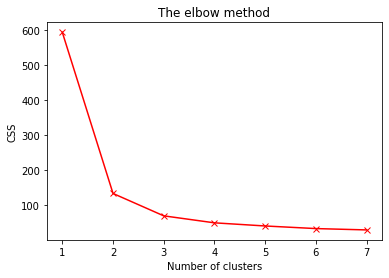

In [ ]:
# Settin the data
x=Data.iloc[:,0:3].values
y = iris.target

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()



In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

From one can clearly see that according to the elbow method most accurate value for number of cluseter is 3. 

## **Applying KMeans Classifier**

In [ ]:
#Applying Kmeans classifier
kmeans_normal = KMeans(n_clusters=4,init = 'random', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans_normal = kmeans_normal.fit_predict(x)


y_kmeans_normal

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3, 1, 3, 3, 3,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0], dtype=int32)

## Accuracy

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=0)


# check how many of the samples were correctly labeled
labels = kmeans_normal.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_kmeans_normal.size)))

Result: 27 out of 150 samples were correctly labeled.
Accuracy score: 0.18


## K-means++

In [ ]:
#Applying Kmeans classifier
kmeans_plus = KMeans(n_clusters=4,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans_plus = kmeans_plus.fit_predict(x)


y_kmeans_plus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
for i in range(10):
  try: 
    if 10 / i == 2.0:
      break
  except ZeroDivisionError:
    print(1)
  else:
    print(2)

1
2
2
2
2


In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=0)


# check how many of the samples were correctly labeled
labels = kmeans_plus.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_kmeans_plus.size)))

Result: 95 out of 150 samples were correctly labeled.
Accuracy score: 0.63


## **Visualizing the Clusters**




In [ ]:
kmeans_normal.cluster_centers_

array([[6.292     , 2.898     , 4.94      ],
       [5.53214286, 2.63571429, 3.96071429],
       [5.006     , 3.428     , 1.462     ],
       [7.12272727, 3.11363636, 6.03181818]])

In [ ]:
kmeans_plus.cluster_centers_

array([[5.006     , 3.428     , 1.462     ],
       [6.292     , 2.898     , 4.94      ],
       [7.12272727, 3.11363636, 6.03181818],
       [5.53214286, 2.63571429, 3.96071429]])

## Voronoi


In [ ]:
import math
import numpy as np


clus_1_1 = [5.7, 4.4, 1.5, 0.4]
clus_1_2 =[6.7, 3.1, 4.4, 1.4]
clus_1_3 = [5.7, 3.8, 1.7, 0.3]
clus_1_4 = [5,  3,  1.6, 0.2]
arr_4d = np.array([clus_1_3,clus_1_2,clus_1_1,clus_1_4])

arr_4d

array([[5.7, 3.8, 1.7, 0.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [5. , 3. , 1.6, 0.2]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
arr_3d = pca.fit(arr_4d).transform(arr_4d)
arr_3d

array([[-0.66849351, -0.16378377,  0.13478245],
       [ 2.48429828,  0.00664705, -0.00963819],
       [-0.91844549, -0.71167187, -0.08280118],
       [-0.89735929,  0.8688086 , -0.04234308]])

In [ ]:
#Applying Kmeans classifier
kmeans_vor = KMeans(n_clusters=4,init = arr_3d, max_iter = 100, n_init = 10, random_state = 0)

y_kmeans_vor = kmeans_vor.fit_predict(x)

y_kmeans_vor

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

## Accuracy

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=0)


# check how many of the samples were correctly labeled
labels = kmeans_vor.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_kmeans_vor.size)))

Result: 1 out of 150 samples were correctly labeled.
Accuracy score: 0.01


## ***From Voronoi***

In [ ]:
kmeans_vor.cluster_centers_

array([[6.35555556, 2.94814815, 5.08888889],
       [5.006     , 3.428     , 1.462     ],
       [5.6125    , 2.628125  , 4.01875   ],
       [7.38571429, 3.13571429, 6.22857143]])

In [ ]:
kmeans_vor.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

## ***Rand_index calculation***

## ***Comparetaive study btw K-means & Voronoi***

In [ ]:
 from sklearn import metrics
 metrics.adjusted_rand_score(kmeans_normal.labels_,y)

0.5950902806203666

In [ ]:
 from sklearn import metrics
 metrics.adjusted_rand_score(kmeans_vor.labels_,y)

0.6188103813915912

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

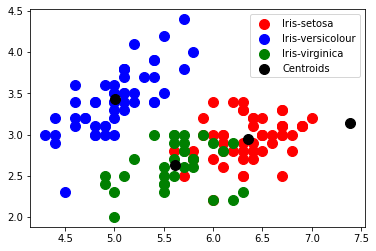

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans_vor == 0, 0], x[y_kmeans_vor == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans_vor == 1, 0], x[y_kmeans_vor == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans_vor == 2, 0], x[y_kmeans_vor == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_vor.cluster_centers_[:, 0], kmeans_vor.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

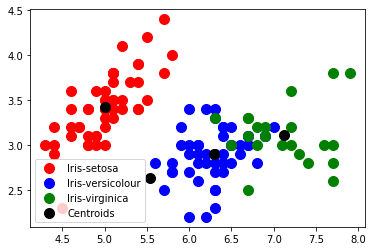

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans_plus == 0, 0], x[y_kmeans_plus == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans_plus == 1, 0], x[y_kmeans_plus == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans_plus == 2, 0], x[y_kmeans_plus == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

# **Thank You!**